In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", 300)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
customer_data = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")
customer_data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


### Objective

Our objective is to predict which customer is more likely to purchase the newly introduced package. Hence our target variable is ProdTaken

In [3]:
cData = customer_data.copy()

In [4]:
cData.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [5]:
cData.shape

(4888, 20)

In [6]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

There are 7 float64 type, 7 int64 type and 6 object type variables

In [7]:
cData.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Our dataset has null values for Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome variables. All these variables are numeric type. We need to handle these null values

In [8]:
cData.duplicated().sum()

0

No duplicates in the dataset

In [9]:
cData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888,NaN,NaN,NaN,202444,1411.19,200000,201222,202444,203665,204887
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6


In [10]:
catCols = []

for cols in cData.columns:
    if cData[cols].dtype == 'object':
        catCols.append(cols)

In [11]:
catCols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In addition to the abvoe object type variables, there are few int64 type variables (ProdTaken, CityTier, Passport and OwnCar) which need to be converted to category type

In [12]:
numCols = ['ProdTaken', 'CityTier', 'Passport', 'OwnCar']

In [13]:
catCols.extend(numCols)
catCols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation',
 'ProdTaken',
 'CityTier',
 'Passport',
 'OwnCar']

In [14]:
cData[catCols] = cData[catCols].astype('category')

In [15]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [16]:
for cols in catCols:
    print(f"Value Counts for {cols}")
    print(cData[cols].value_counts())
    print("*"*50)

Value Counts for TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Value Counts for Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Value Counts for Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Value Counts for ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Value Counts for MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Value Counts for Designation
Executive         1842
Manager           173

##### Observations

    - TypeofContact for most of the customers is of type Self Enquiry
    
    - We see three unique types for Gender - Male, Female and Fe Male. Female and Fe Male are same but due to an extra space they are considered as two unique types. We need to correct this
    
    - Most of the customers belong to CityTier 1 
    
    - Most of the customers don't have a passport and most of the customers own a car
    
    - Most of the customers are salaried 
    
    - Most of the customers are Males
    
    - Most of the customers are married
    
    - Basic type of ProductPitched is prefered by most of the customers
    
    - 3968 customers didn't take the product and only 920 customers took the product. 
    There is lot of chance to increase customer base who can take the product
    


In [17]:
# Rename Fe Male type to Female

cData['Gender'] = cData['Gender'].apply(lambda gen: 'Female' if gen == 'Fe Male' else gen)

In [18]:
cData['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [19]:
cData_new = cData.copy()

In [20]:
cData_new.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [21]:
cData_new.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


CustomerID is not required and we can delete this column

In [22]:
cData_new.drop('CustomerID', axis=1, inplace=True)

In [23]:
cData_new.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Missing Value Treatment

In [24]:
cData_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


##### Observations
    
    - Customers age ranges between 18 years and 61 years
    
    - DurationOfPitch and NumberOfTrips have outliers.
    
    - MonthlyIncome has huge no.of outliers. 75% of customers have montly income less than 25571 but max value for monthly income is 98678.

In [25]:
# We have to impute missing values for Age
cData_new[cData_new["Age"].isnull()].head(200)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
51,1,NaN,Self Enquiry,1,11.0,Large Business,Male,2,3.0,Basic,3.0,Single,2.0,1,2,1,0.0,Executive,18441.0
54,0,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,3.0,Divorced,1.0,1,2,1,0.0,Manager,NaN
57,0,NaN,Self Enquiry,1,29.0,Small Business,Female,1,3.0,Basic,5.0,Divorced,4.0,1,4,1,0.0,Executive,NaN


There is a pattern with missing data for Age column. All the missing values are for customers with Executive and Manager Designation. We can impute these missing values using median

In [26]:
cData_new.groupby(['Designation'])['Age'].median()

Designation
AVP               49.0
Executive         32.0
Manager           36.0
Senior Manager    38.0
VP                49.0
Name: Age, dtype: float64

In [27]:
cData_new['Age'] = cData_new.groupby(["Designation"])["Age"].apply(lambda x: x.fillna(x.median()))

In [28]:
cData_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [29]:
cData_new[cData_new["TypeofContact"].isnull()].head(25)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


In [30]:
cData_new["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [31]:
cData_new["TypeofContact"] = cData_new["TypeofContact"].fillna("Self Enquiry")

In [32]:
cData_new.groupby(["Gender",'ProductPitched'])["DurationOfPitch"].median()

Gender  ProductPitched
Female  Basic             13.0
        Deluxe            14.0
        King              11.0
        Standard          14.0
        Super Deluxe      13.0
Male    Basic             13.0
        Deluxe            14.0
        King              10.0
        Standard          14.0
        Super Deluxe      13.0
Name: DurationOfPitch, dtype: float64

In [33]:
cData_new['DurationOfPitch']=cData_new.groupby(["Gender",'ProductPitched'])["DurationOfPitch"].apply(lambda x:x.fillna(x.median()))


In [34]:
cData_new.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

Gender  ProductPitched
Female  Basic             4.0
        Deluxe            4.0
        King              4.0
        Standard          4.0
        Super Deluxe      4.0
Male    Basic             4.0
        Deluxe            4.0
        King              4.0
        Standard          4.0
        Super Deluxe      4.0
Name: NumberOfFollowups, dtype: float64

In [35]:
cData_new["NumberOfFollowups"] = cData_new.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))


In [36]:
cData_new[cData_new["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


PreferredPropertyStar which has null values have mostly King type as ProductPitched and most customers have designation VP

In [37]:
cData_new.groupby(["Designation"])["PreferredPropertyStar"].median()

Designation
AVP               3.0
Executive         3.0
Manager           3.0
Senior Manager    3.0
VP                3.0
Name: PreferredPropertyStar, dtype: float64

In [38]:
cData_new['PreferredPropertyStar']=cData_new.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))


In [39]:
cData_new.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

In [40]:
cData_new["NumberOfTrips"] = cData_new.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

In [41]:
cData_new[cData_new["NumberOfChildrenVisiting"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
851,0,56.0,Self Enquiry,1,10.0,Large Business,Female,3,3.0,King,5.0,Married,5.0,0,4,0,NaN,VP,34943.0
898,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,King,3.0,Divorced,4.0,0,5,1,NaN,VP,34740.0
918,0,51.0,Company Invited,3,15.0,Salaried,Male,2,3.0,King,4.0,Married,5.0,1,4,1,NaN,VP,34847.0
956,0,56.0,Self Enquiry,2,14.0,Salaried,Male,2,3.0,King,4.0,Single,7.0,0,4,1,NaN,VP,34717.0
1009,0,58.0,Self Enquiry,1,6.0,Small Business,Female,3,3.0,King,5.0,Divorced,4.0,1,1,1,NaN,VP,34701.0


In [42]:
cData_new.groupby(["MaritalStatus"])["NumberOfChildrenVisiting"].median()

MaritalStatus
Divorced     1.0
Married      1.0
Single       1.0
Unmarried    1.0
Name: NumberOfChildrenVisiting, dtype: float64

Since there are many customers with MaritalStatus as Single for NumberOfChildrenVisiting null values, we can impute 0 for all the null values for NumberOfChildrenVisiting

In [43]:
cData_new['NumberOfChildrenVisiting']=cData_new['NumberOfChildrenVisiting'].fillna(0)

In [44]:
cData_new.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female        NaN
                                Male          NaN
                Executive       Female        NaN
                                Male      18929.0
                Manager         Female        NaN
                                Male          NaN
                Senior Manager  Female        NaN
                                Male          NaN
                VP              Female        NaN
                                Male          NaN
Large Business  AVP             Female    31872.0
                                Male      29959.0
                Executive       Female    20748.0
                                Male      20743.5
                Manager         Female    22198.5
                                Male      21997.0
                Senior Manager  Female    28266.0
                                Male      26838.5
                VP              Female    36583.0
           

In [45]:
cData_new["MonthlyIncome"]=cData_new.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [46]:
cData_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [47]:
cData_new.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

All null values are imputed

In [48]:
cData_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.401800,8.307361,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.224223,1.824971,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4888.0,1.171236,0.862999,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4888.0,23543.855769,5267.651455,1000.0,20438.25,22393.0,25424.75,98678.0


In [49]:
cData_new["Age_Bin"] = pd.cut(cData_new["Age"], bins=[15, 30, 45, 65], labels=["15 - 30", "31 - 45", "46 - 65"])

In [50]:
cData_new.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_Bin
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,31 - 45
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,46 - 65
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31 - 45
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31 - 45
4,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31 - 45
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,31 - 45
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0,46 - 65
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0,15 - 30
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0,31 - 45
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0,31 - 45


In [51]:
cData_new["Age_Bin"].value_counts()

31 - 45    2799
15 - 30    1115
46 - 65     974
Name: Age_Bin, dtype: int64

In [52]:
cData_new["Income_Bin"] = pd.cut(cData_new["MonthlyIncome"], bins=[0, 20000, 30000, 40000, 100000], 
                                 labels=["0-20000", "20001-30000", "30001-40000", "40001-100000"])


In [53]:
cData_new["Income_Bin"].value_counts()

20001-30000     3258
0-20000         1040
30001-40000      588
40001-100000       2
Name: Income_Bin, dtype: int64

### Univariate Analysis

In [54]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [55]:
# We have to create profile for customers who purchased a package
cust_prod=cData_new[cData_new['ProdTaken']==1]

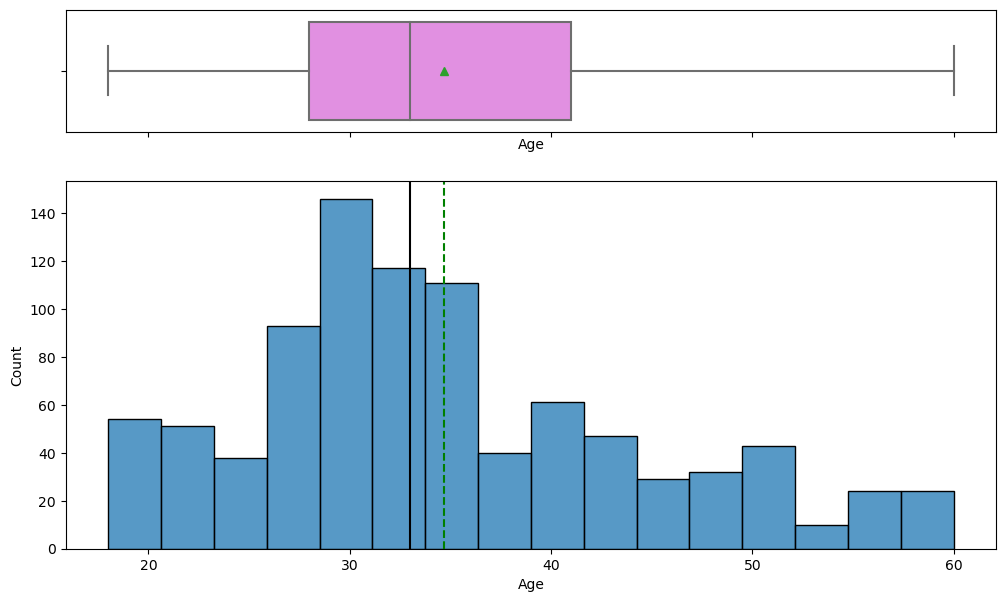

In [56]:
histogram_boxplot(cust_prod,'Age')

Average age of the customers who bought a package is around 35 years of age

Age of customers who bought a product ranges between 18 and 60

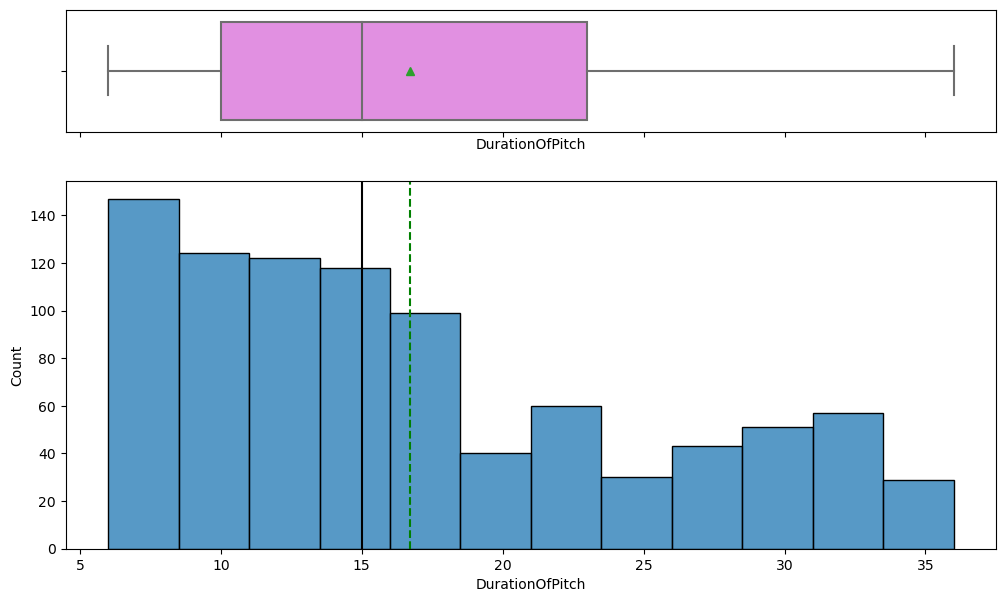

In [57]:
histogram_boxplot(cust_prod,'DurationOfPitch')

Average durationofpitch of customers who bought a package is around 16 and ranges between 6 and 36


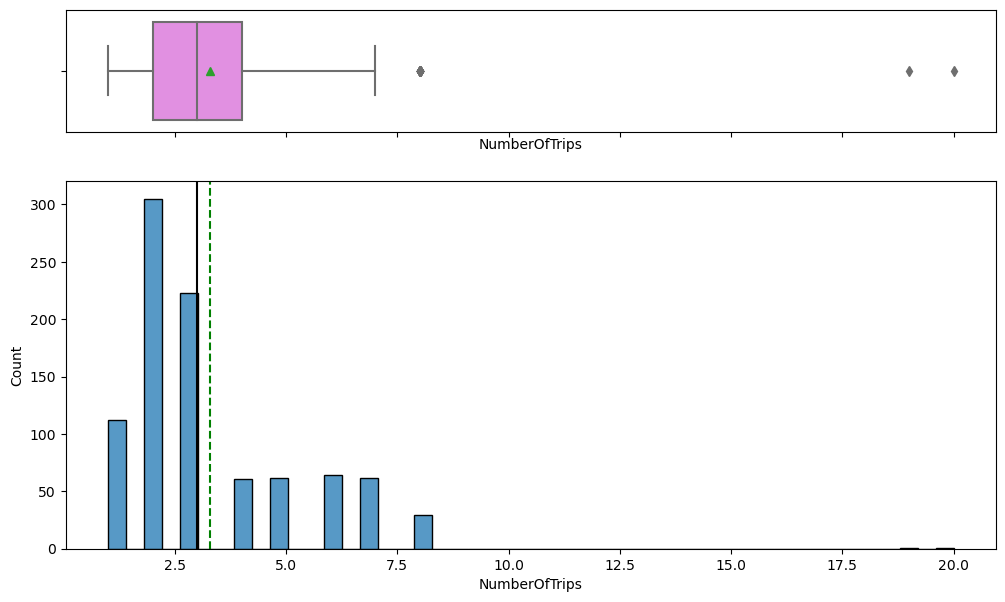

In [58]:
histogram_boxplot(cust_prod,'NumberOfTrips')

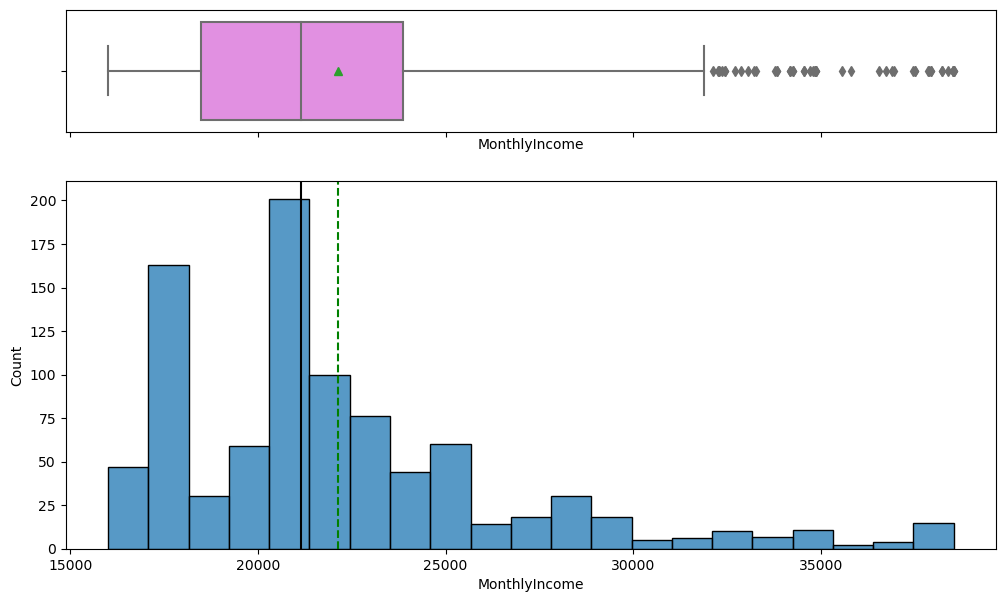

In [59]:
histogram_boxplot(cust_prod,'MonthlyIncome')

Average monthly income of customers who purchased a package is around 22000

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

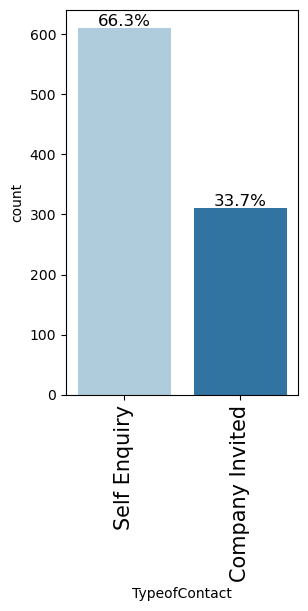

In [61]:
labeled_barplot(cust_prod, "TypeofContact", perc=True)
plt.show()

TypeofContact for 66.3% of the customers who purchased a package is Self Enquiry

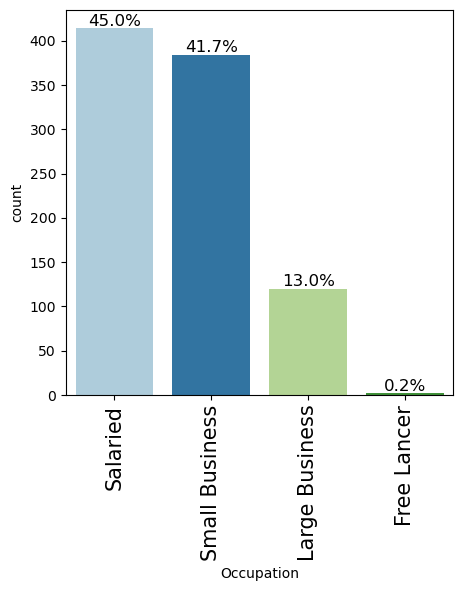

In [62]:
labeled_barplot(cust_prod, "Occupation", perc=True)
plt.show()

41% of customers who purchased a package are Salaried which is the highest and 41.7% of the customers have occupation Small Business, 13% of the customers have Large Business and 0.2% of the customers are Freelancers

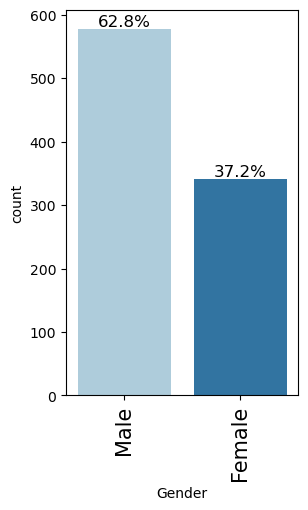

In [63]:
labeled_barplot(cust_prod, "Gender", perc=True)
plt.show()

62.8% of the customers who purchased a package are Males

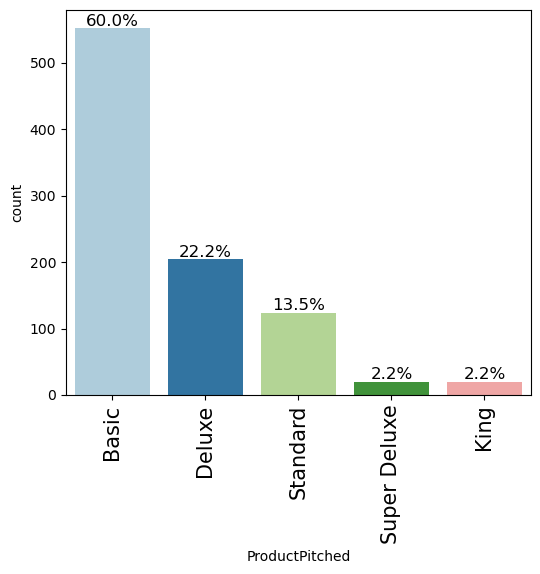

In [64]:
labeled_barplot(cust_prod,"ProductPitched",perc=True)

Basic type of productpitched is 60% which is the highest among all the 5 types and Deluxe is the next highest with 22.2% 

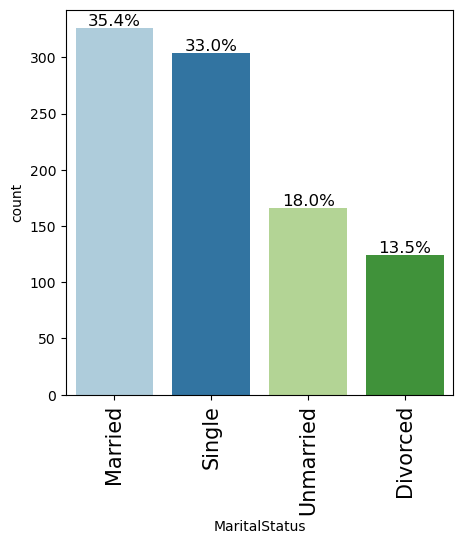

In [65]:
labeled_barplot(cust_prod,"MaritalStatus",perc=True)

35.4% of the customers who purchased a package are Married and 33.3% are Single.

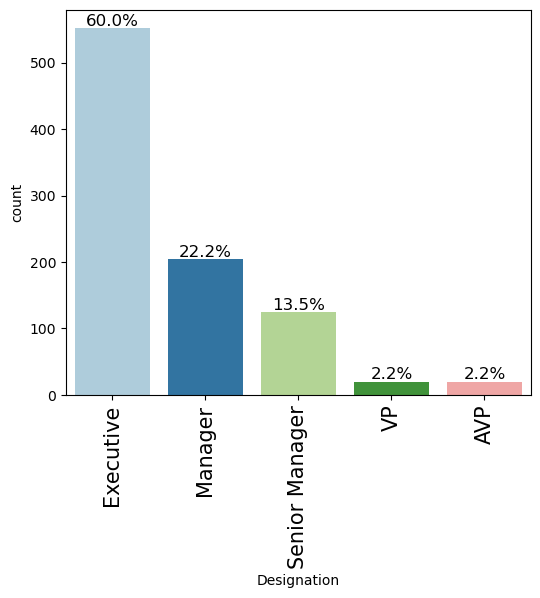

In [66]:
labeled_barplot(cust_prod,"Designation",perc=True)

60% of the customers who purchased a package are Executives which is the highest among all the 5 Designations

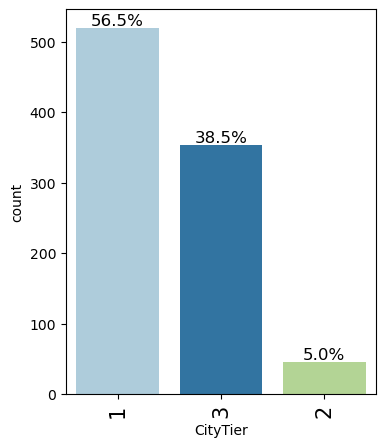

In [67]:
labeled_barplot(cust_prod,"CityTier",perc=True)

56.5% of the customers who purchased a package lives in CityTier 1, 38.5% of the customers lives in CityTier 3

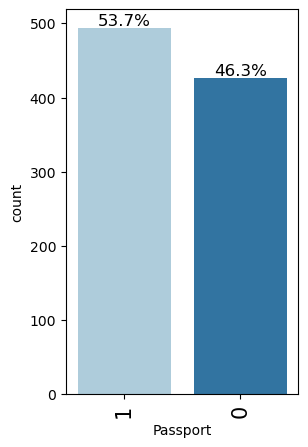

In [68]:
labeled_barplot(cust_prod,"Passport",perc=True)

53.7% of the customers who purchased a package have passport

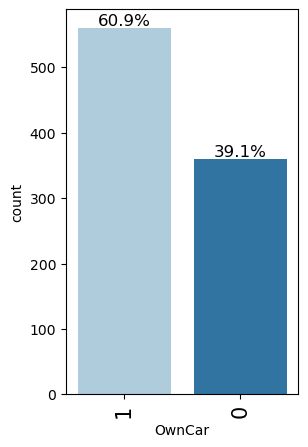

In [69]:
labeled_barplot(cust_prod,"OwnCar",perc=True)

60.9% of the customers who purchased a package owns a car

#### Bi-variate Analysis

<AxesSubplot:xlabel='Age_Bin', ylabel='count'>

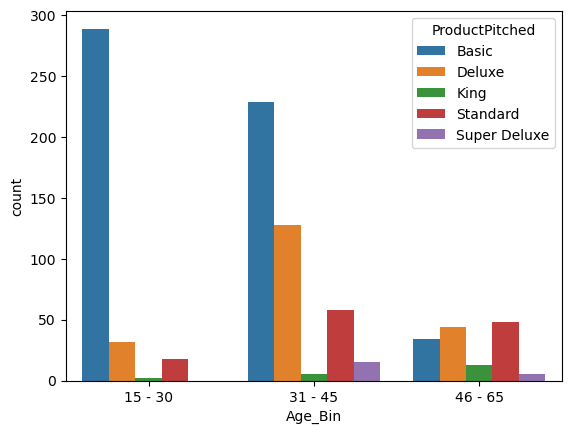

In [70]:
sns.countplot(data=cust_prod,x='Age_Bin',hue='ProductPitched')

<AxesSubplot:xlabel='Income_Bin', ylabel='count'>

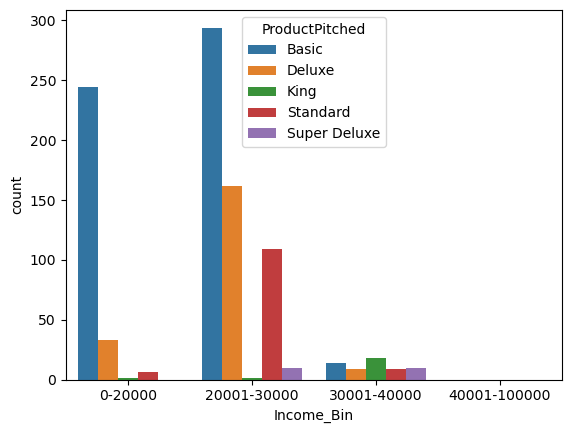

In [71]:
sns.countplot(data=cust_prod,x='Income_Bin',hue='ProductPitched')

In [72]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProductPitched   Basic  Deluxe  King  Standard  Super Deluxe   All
TypeofContact                                                     
All               1842    1732   230       742           342  4888
Self Enquiry      1326    1191   182       524           246  3469
Company Invited    516     541    48       218            96  1419
------------------------------------------------------------------------------------------------------------------------


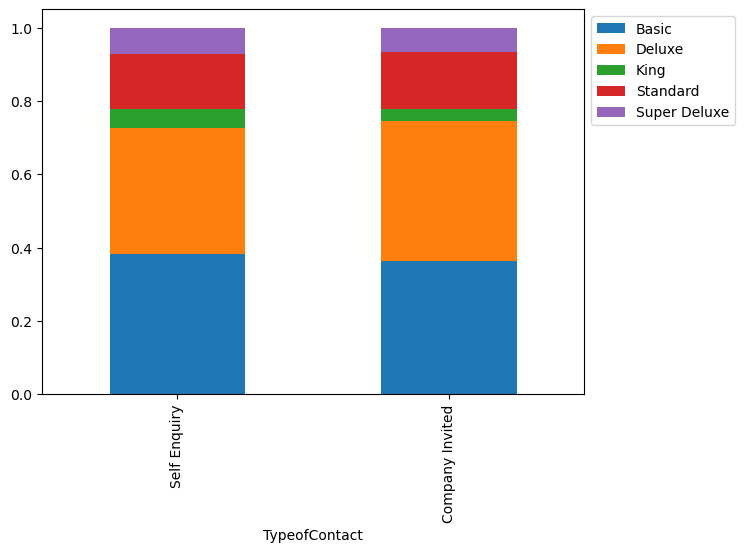

In [73]:
stacked_barplot(cData_new, "TypeofContact", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Occupation                                                       
All              1842    1732   230       742           342  4888
Salaried          924     818   114       338           174  2368
Small Business    720     790   104       320           150  2084
Large Business    196     124    12        84            18   434
Free Lancer         2       0     0         0             0     2
------------------------------------------------------------------------------------------------------------------------


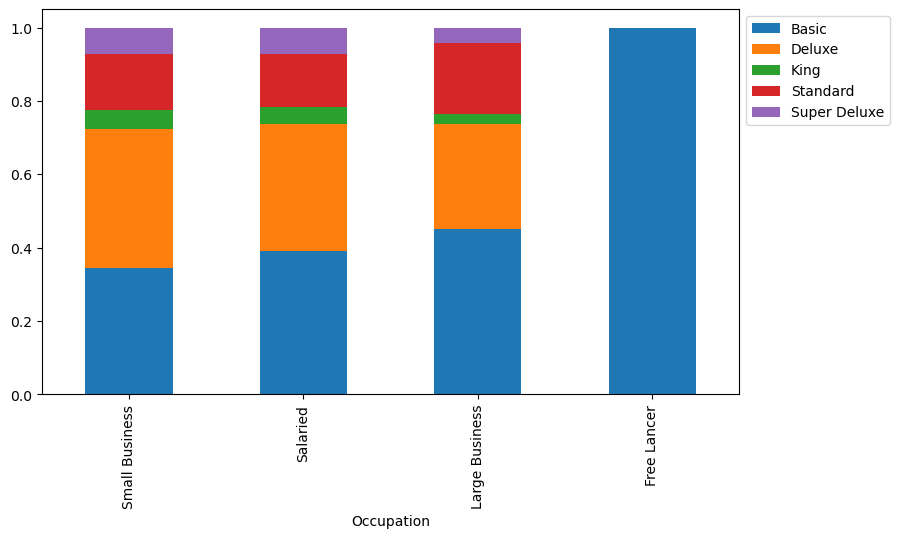

In [74]:
stacked_barplot(cData_new, "Occupation", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Gender                                                           
All              1842    1732   230       742           342  4888
Male             1162    1008   148       416           182  2916
Female            680     724    82       326           160  1972
------------------------------------------------------------------------------------------------------------------------


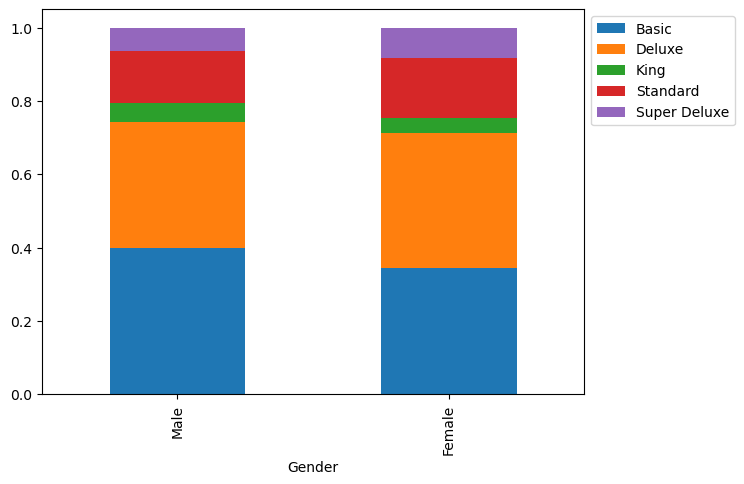

In [75]:
stacked_barplot(cData_new, "Gender", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
MaritalStatus                                                    
All              1842    1732   230       742           342  4888
Married           816     852   126       380           166  2340
Divorced          332     336    52       142            88   950
Single            511     221    52        50            82   916
Unmarried         183     323     0       170             6   682
------------------------------------------------------------------------------------------------------------------------


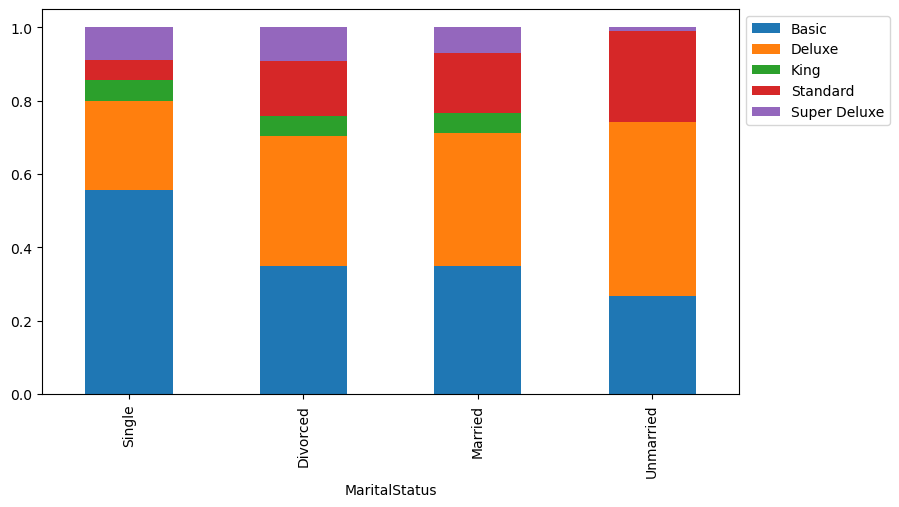

In [76]:
stacked_barplot(cData_new, "MaritalStatus", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Designation                                                      
VP                  0       0   230         0             0   230
All              1842    1732   230       742           342  4888
AVP                 0       0     0         0           342   342
Executive        1842       0     0         0             0  1842
Manager             0    1732     0         0             0  1732
Senior Manager      0       0     0       742             0   742
------------------------------------------------------------------------------------------------------------------------


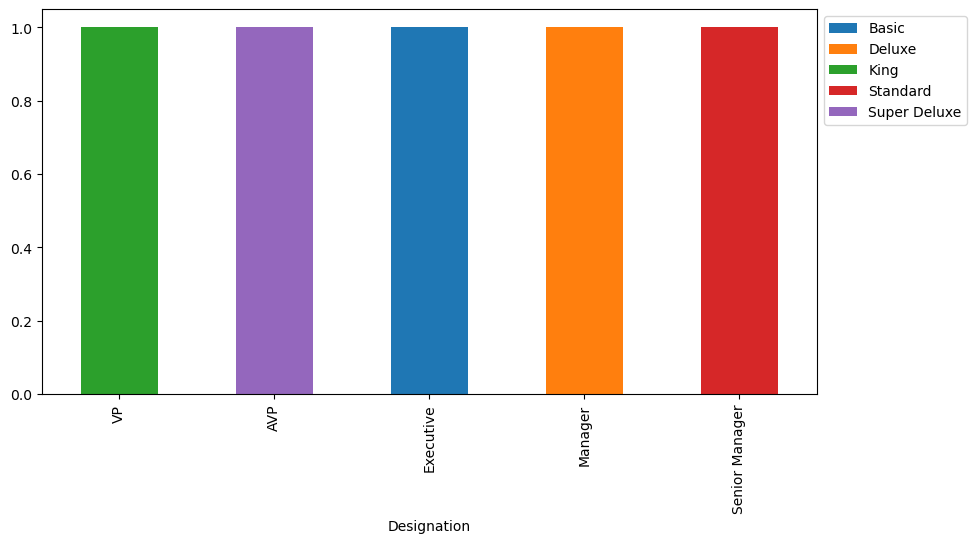

In [77]:
stacked_barplot(cData_new, "Designation", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
CityTier                                                         
All              1842    1732   230       742           342  4888
1                1466     908   168       436           212  3190
3                 268     784    40       288           120  1500
2                 108      40    22        18            10   198
------------------------------------------------------------------------------------------------------------------------


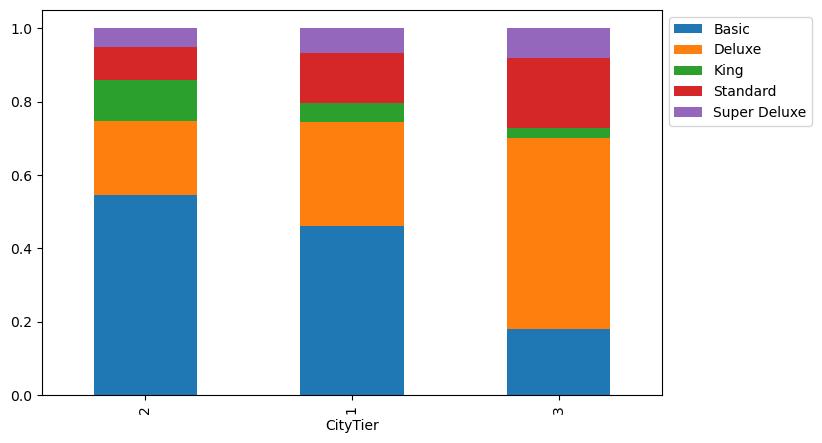

In [78]:
stacked_barplot(cData_new, "CityTier", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Passport                                                         
All              1842    1732   230       742           342  4888
0                1274    1252   170       532           238  3466
1                 568     480    60       210           104  1422
------------------------------------------------------------------------------------------------------------------------


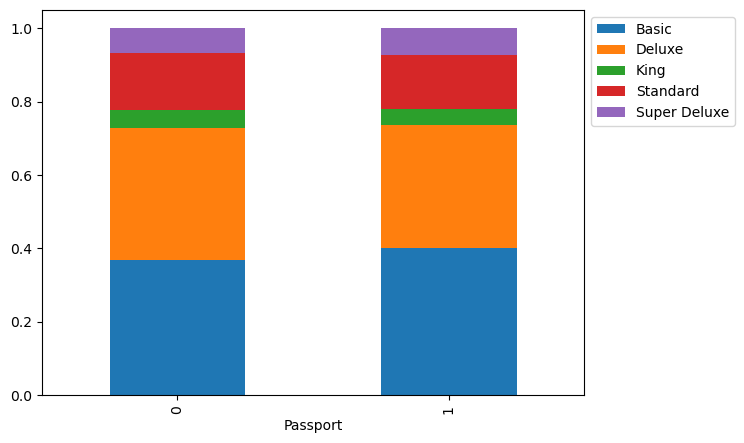

In [79]:
stacked_barplot(cData_new, "Passport", "ProductPitched")

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
OwnCar                                                           
All              1842    1732   230       742           342  4888
1                1084    1058   166       484           240  3032
0                 758     674    64       258           102  1856
------------------------------------------------------------------------------------------------------------------------


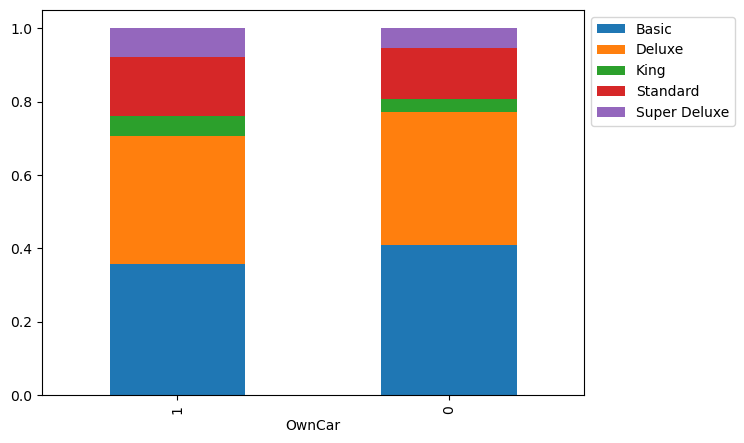

In [80]:
stacked_barplot(cData_new, "OwnCar", "ProductPitched")

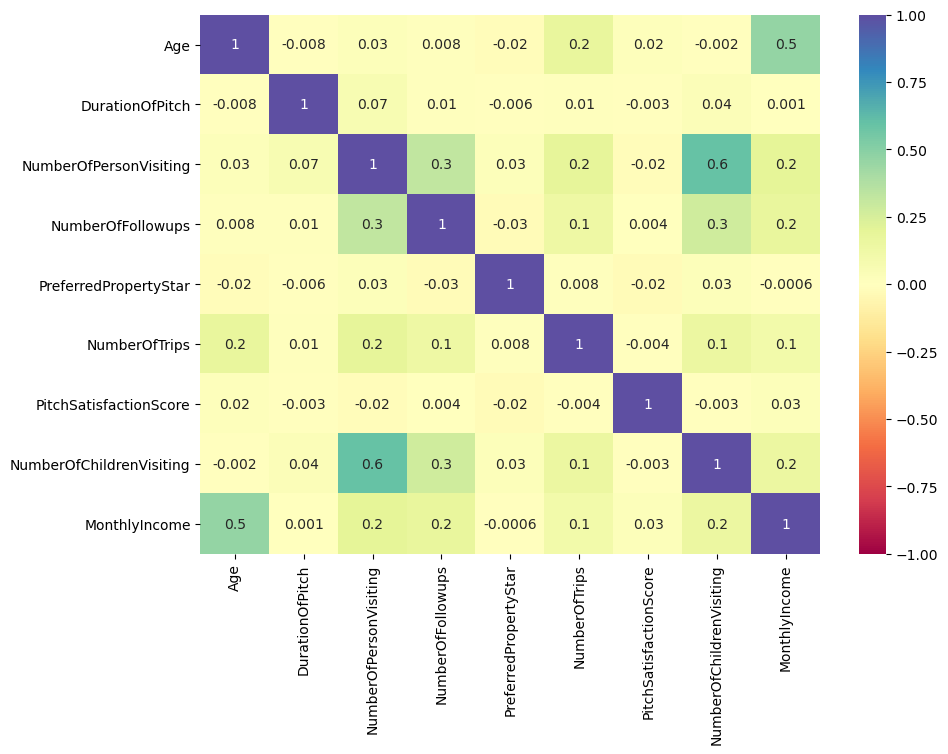

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(cData_new.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

##### Observations

- Profile of Customers who purchased a package based on EDA -


    * Average age of the customers is around 35 years of age

    * Age of customers ranges between 18 and 60

    * Average durationofpitch of customers is around 16 and ranges between 6 and 36

    * Average monthly income of customers is around 22000

    * TypeofContact for 66.3% of the customers is Self Enquiry

    * 45% of customers are Salaried which is the highest and 41.7% of the customers have occupation Small Business, 13% of the customers have Large Business and 0.2% of the customers are Freelancers

    * 62.8% of the customers are Males

    * Basic type of productpitched is 60% which is the highest among all the 5 types and Deluxe is the next highest with 22.2% 

    * 35.4% of the customers are Married and 33.3% are Single.

    * 60% of the customers are Executives which is the highest among all the 5 Designations

    * 56.5% of the customers lives in CityTier 1, 38.5% of the customers lives in CityTier 3

    * 53.7% of the customers have passport

    * 60.9% of the customers own a car

- Customer Profile for ProductPitched - Basic

    * Maximum no.of customers are within the age 15-30 years and 31-45 years
    * Maximum no.of customers have income range 20001-30000
    * Both Self Enquiry and Company Invited Contact type has maximum no.of customers for Basic ProductPitched

- Customer Profile for ProductPitched - Standard
    * This package has More customers of the age between 31-65 years 
    * Income range for most of these customers is 20001-30000
    * This has more customers with Senior Manager designation 

- Customer Profile for ProductPitched - Deluxe

    * Most of the Customers of this package lives in CityTier 3
    * Most of the customers of this package has passport
    * Most of the customers of this package owns a car

- Customer Profile for ProductPitched - Super Deluxe
    * Only 2.2% of customers purchased this package
    * Most of the Customers who purchased this package has age range 31-45 years and very less customers are in the age range 46-65
    * Max no.of the customers who purchased this package are in the income range 20001-40000

- Customer Profile for ProductPitched - King
    * All the customers who purchased this package are single, divorced or married. Unmarried customers didn’t purchase this package
    * Only 2.2% customers purchased this package
    * Most of the Customers who purchased this package has age range 46-65 years and very less customers are in the age range 31-45
    * Max no.of the customers who purchased this package are in the income range 30001-40000

In [82]:
cData2 = cData_new.copy()

In [83]:
cData2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.401800,8.307361,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.224223,1.824971,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4888.0,1.171236,0.862999,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4888.0,23543.855769,5267.651455,1000.0,20438.25,22393.0,25424.75,98678.0


In [84]:
numeric_columns = ["Age", "DurationOfPitch", "NumberOfTrips", "MonthlyIncome"]

In [85]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = cData2[numeric_columns].quantile(0.25)
Q3 = cData2[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [86]:
# Percentage of outliers in each column
((cData2[numeric_columns] < lower_whisker) | (cData2[numeric_columns] > upper_whisker)).sum()/cData2.shape[0]*100

Age                0.000000
DurationOfPitch    2.291326
NumberOfTrips      2.229951
MonthlyIncome      7.528642
dtype: float64

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

In [87]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

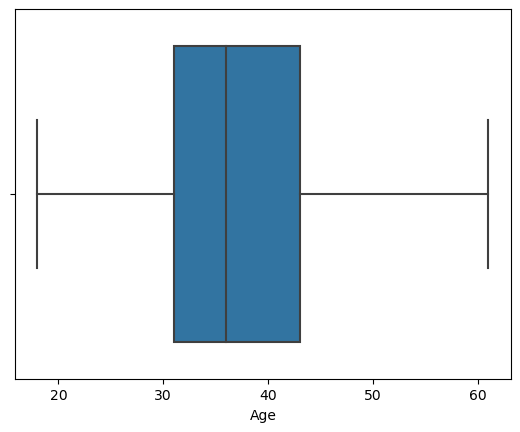

In [88]:
# visualizing Age column before outlier treatment
sns.boxplot(data=cData2,x='Age')
plt.show()

In [89]:
cData2 = treat_outliers(cData2,'Age')

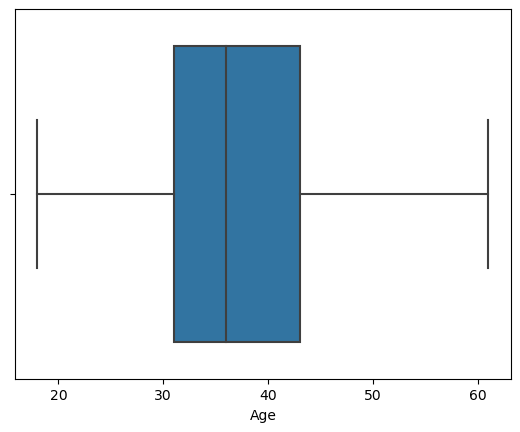

In [90]:
# visualizing Age column after outlier treatment
sns.boxplot(data=cData2,x='Age')
plt.show()

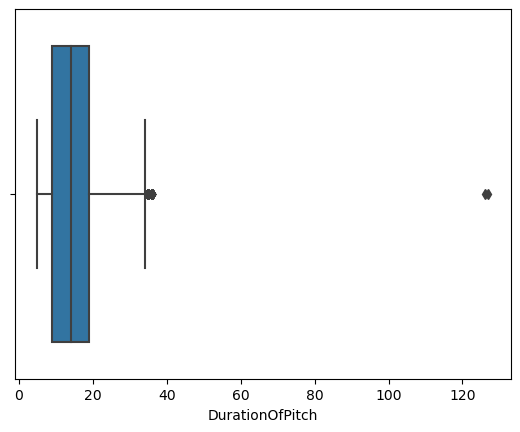

In [91]:
# visualizing DurationOfPitch column before outlier treatment
sns.boxplot(data=cData2,x='DurationOfPitch')
plt.show()

In [92]:
cData2 = treat_outliers(cData2,'DurationOfPitch')

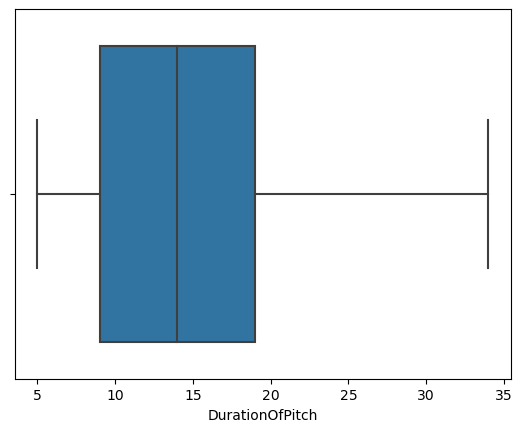

In [93]:
# visualizing DurationOfPitch column after outlier treatment
sns.boxplot(data=cData2,x='DurationOfPitch')
plt.show()

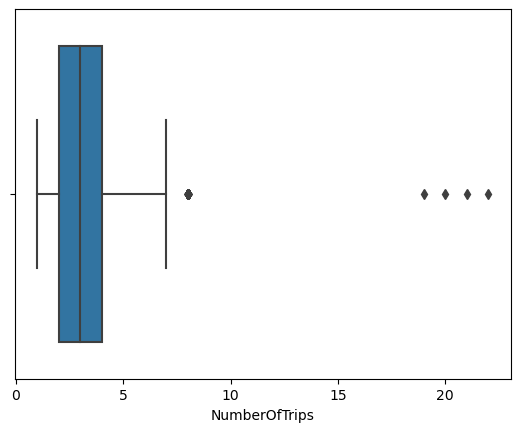

In [94]:
# visualizing NumberOfTrips column before outlier treatment
sns.boxplot(data=cData2,x='NumberOfTrips')
plt.show()

In [95]:
cData2 = treat_outliers(cData2,'NumberOfTrips')

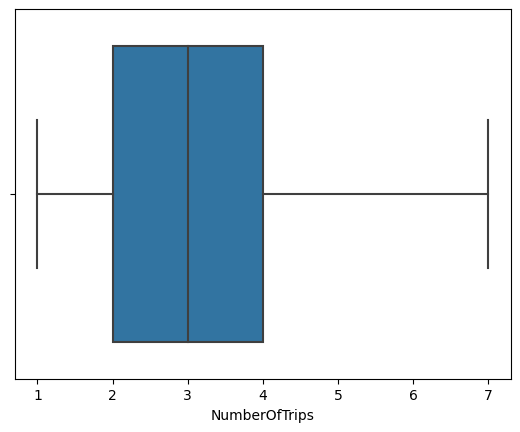

In [96]:
# visualizing NumberOfTrips column after outlier treatment
sns.boxplot(data=cData2,x='NumberOfTrips')
plt.show()

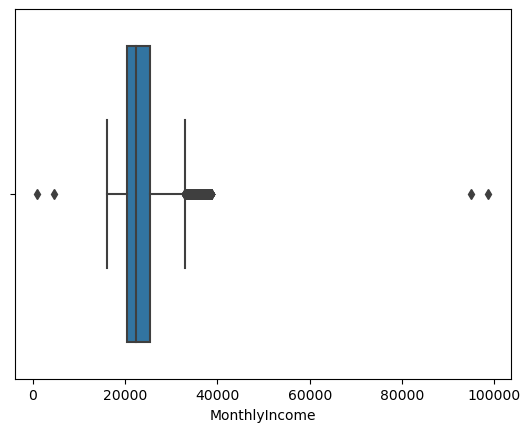

In [97]:
# visualizing MonthlyIncome column before outlier treatment
sns.boxplot(data=cData2,x='MonthlyIncome')
plt.show()

In [98]:
cData2 = treat_outliers(cData2,'MonthlyIncome')

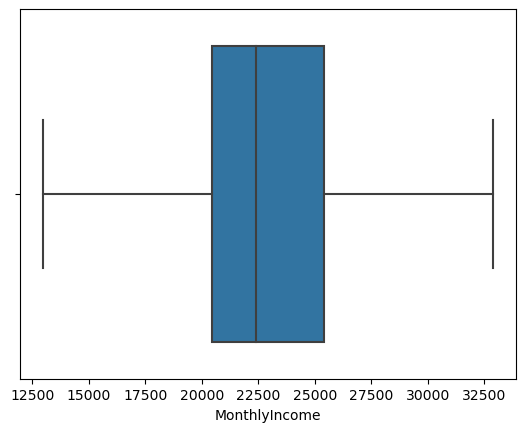

In [99]:
# visualizing DurationOfPitch column after outlier treatment
sns.boxplot(data=cData2,x='MonthlyIncome')
plt.show()

### Train-Test Split

In [100]:

X = cData2.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Age_Bin','Income_Bin'],axis=1)
y = cData2["ProdTaken"]

In [101]:
X.head(10)

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,Free Lancer,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
4,32.0,Self Enquiry,1,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0
5,32.0,Company Invited,1,Salaried,Male,3,3.0,Single,1.0,0,1,1.0,Executive,18068.0
6,59.0,Self Enquiry,1,Small Business,Female,2,5.0,Divorced,5.0,1,1,1.0,Executive,17670.0
7,30.0,Self Enquiry,1,Salaried,Male,3,3.0,Married,2.0,0,0,1.0,Executive,17693.0
8,38.0,Company Invited,1,Salaried,Male,2,3.0,Unmarried,1.0,0,0,0.0,Senior Manager,24526.0
9,36.0,Self Enquiry,1,Small Business,Male,3,3.0,Divorced,7.0,0,1,0.0,Manager,20237.0


In [102]:
X = pd.get_dummies(X, drop_first=True)

In [103]:
X.head(10)

,Age,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,...,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,3.0,1.0,0.0,20993.0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,49.0,3,4.0,2.0,2.0,20130.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,37.0,3,3.0,7.0,0.0,17090.0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
3,33.0,2,3.0,2.0,1.0,17909.0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,32.0,2,4.0,1.0,0.0,18468.0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
5,32.0,3,3.0,1.0,1.0,18068.0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
6,59.0,2,5.0,5.0,1.0,17670.0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
7,30.0,3,3.0,2.0,1.0,17693.0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
8,38.0,2,3.0,1.0,0.0,24526.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9,36.0,3,3.0,7.0,0.0,20237.0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [104]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Target variable has imabalnace data. 

In [105]:
# We use stratify=y when there is imabalance in the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [106]:
X_train.shape

(3421, 22)

In [107]:
X_test.shape

(1467, 22)

In [108]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [109]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
     #F1 score of the model
    train_f1score = metrics.f1_score(y_train,pred_train)
    test_f1score = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1score,test_f1score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [110]:
def check_feature_importance(estimator):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)
    feature_names = list(X.columns)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

### Model Building

Our objective is to predict potential customers who will buy new package and if our model predicts a potential customer as negative (False Negative), it is more costlier for the tourism company named "Visit with us". So the evaluation metric we need to focus here is Recall

### Bagging 

#### Bagging Classifier

In [111]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [112]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.8929788684389911
Recall on training set :  0.968944099378882
Recall on test set :  0.5217391304347826
Precision on training set :  0.9968051118210862
Precision on test set :  0.8520710059171598
F1 score on training set :  0.9826771653543307
F1 score on test set :  0.647191011235955


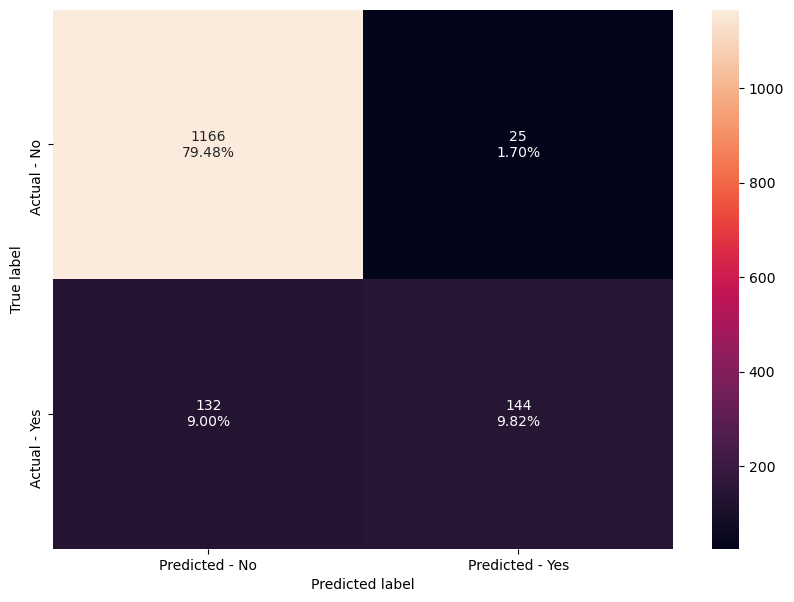

In [113]:
make_confusion_matrix(bagging_estimator,y_test)

#### Random Forest Classifier

In [114]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [115]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8970688479890934
Recall on training set :  1.0
Recall on test set :  0.5072463768115942
Precision on training set :  1.0
Precision on test set :  0.9032258064516129
F1 score on training set :  1.0
F1 score on test set :  0.6496519721577726


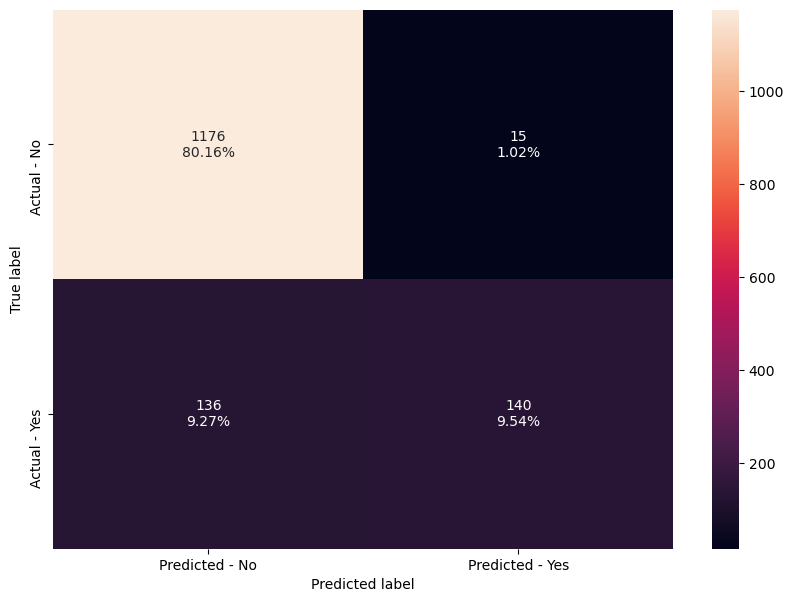

In [116]:
make_confusion_matrix(rf_estimator,y_test)

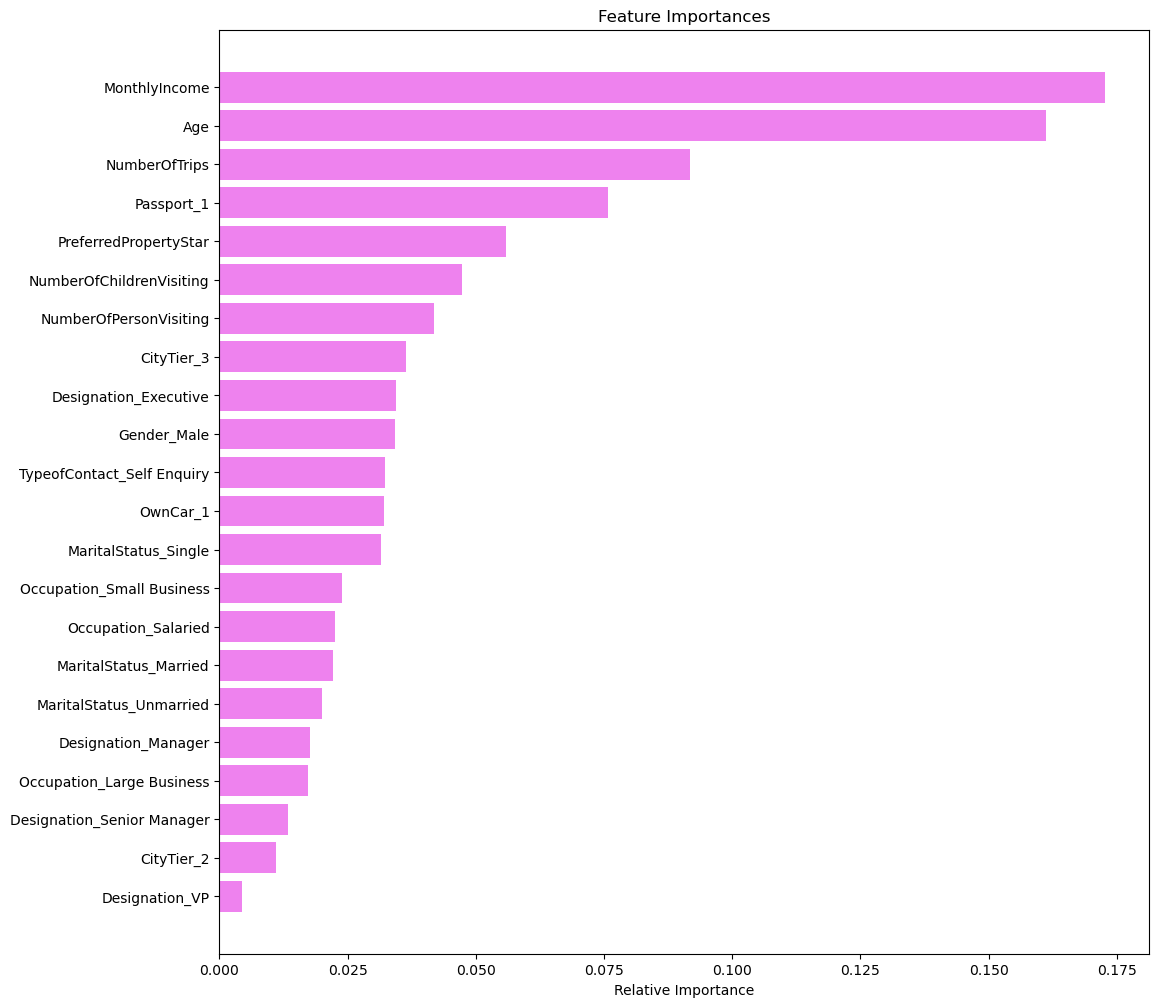

In [117]:
check_feature_importance(rf_estimator)

- Monthly Income, Age, No.of Trips, Passport, PreferedPropertyStar are 5 most important features according to Random Forest Classifier

#### Decision Tree Estimator

In [118]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [119]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8732106339468303
Recall on training set :  1.0
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.65625
F1 score on training set :  1.0
F1 score on test set :  0.6702127659574468


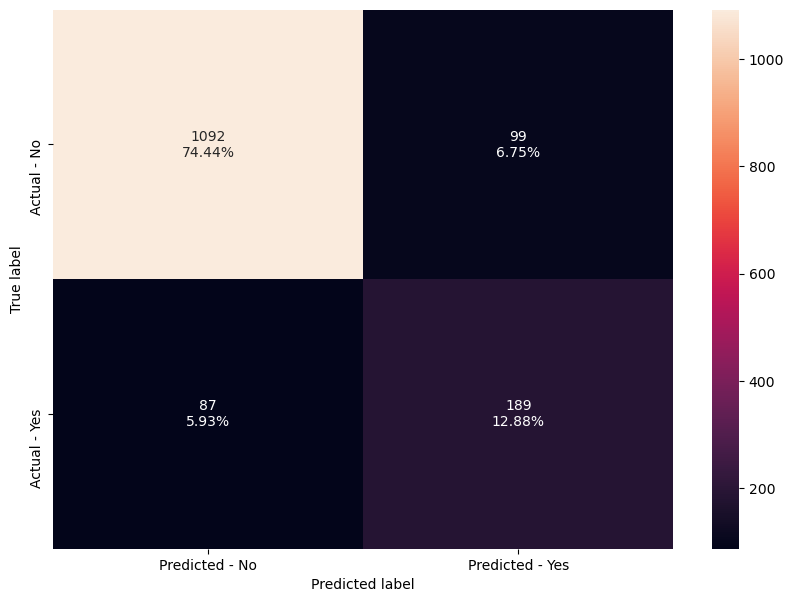

In [120]:
make_confusion_matrix(dtree,y_test)

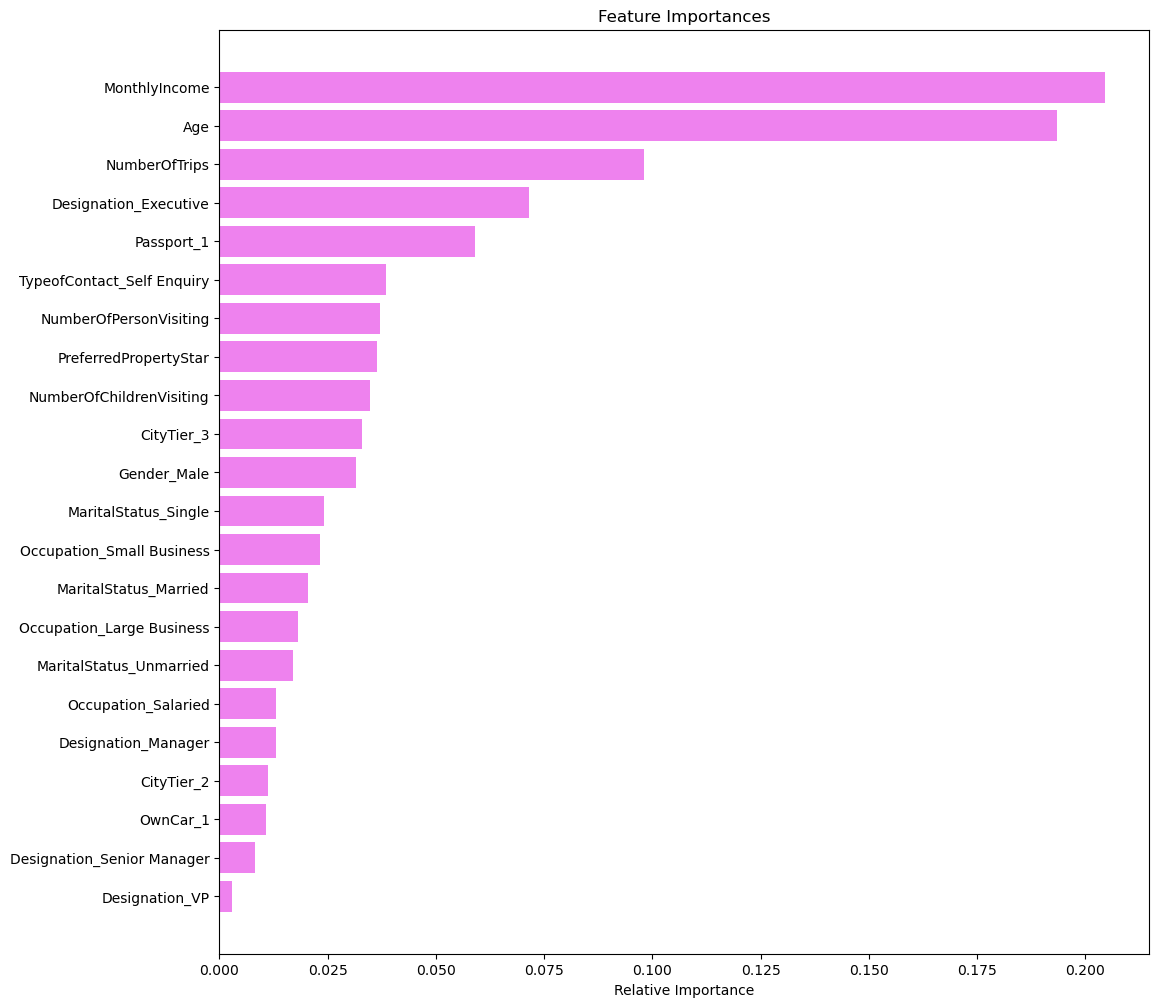

In [121]:
check_feature_importance(dtree)

- Monthly Income, Age, No.of Trips, Designaion_Executive and Passport are 5 most important features according to Decision Tree Classifier



##### Comparing model performance

In [122]:
models = []
models = [bagging_estimator, rf_estimator, dtree]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []

In [123]:
for model in models:
    metric = get_metrics_score(model,False)
    acc_train.append(np.round(metric[0],2))
    acc_test.append(np.round(metric[1],2))
    recall_train.append(np.round(metric[2],2))
    recall_test.append(np.round(metric[3],2))
    precision_train.append(np.round(metric[4],2))
    precision_test.append(np.round(metric[5],2))
    f1score_train.append(np.round(metric[6],2))
    f1score_test.append(np.round(metric[7],2))

In [124]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier default','Random Forest default','Decision Tree default'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train_f1score':f1score_train,'Test_f1score':f1score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1score,Test_f1score
0,Bagging classifier default,0.99,0.89,0.97,0.52,1.0,0.85,0.98,0.65
1,Random Forest default,1.00,0.90,1.00,0.51,1.0,0.90,1.00,0.65
2,Decision Tree default,1.00,0.87,1.00,0.68,1.0,0.66,1.00,0.67


Observations:

- Comparing Bagging Classifier, Random Forest Classifier and Deicision Tree Classifier which are build with default parameters

    - All the three models are overfitting on training data. Recall score for train data is very high when compared to Test data recall score
    
    - Among the three models, Decision Tree Estimator has better Recall score on Test data relatively

#### Bagging Classifier Tuned

In [125]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [126]:
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9066121336059987
Recall on training set :  0.9984472049689441
Recall on test set :  0.5579710144927537
Precision on training set :  1.0
Precision on test set :  0.9112426035502958
F1 score on training set :  0.9992229992229993
F1 score on test set :  0.6921348314606742


#### Random Forest Classifier Tuned

In [132]:
%%time
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}],
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,n_jobs=-1,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

CPU times: user 4.78 s, sys: 460 ms, total: 5.24 s
Wall time: 1min 40s


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=0.2,
                       max_samples=0.5, min_samples_leaf=9, n_estimators=200,
                       random_state=1)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8547208418591056
Accuracy on test set :  0.8438991138377642
Recall on training set :  0.7049689440993789
Recall on test set :  0.644927536231884
Precision on training set :  0.5965834428383706
Precision on test set :  0.5760517799352751
F1 score on training set :  0.6462633451957297
F1 score on test set :  0.6085470085470086


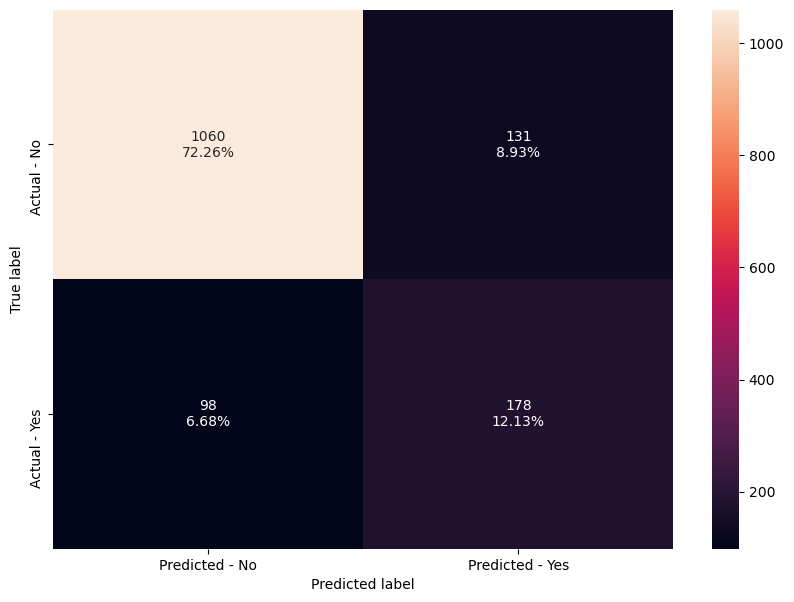

In [129]:
make_confusion_matrix(rf_estimator_weighted,y_test)

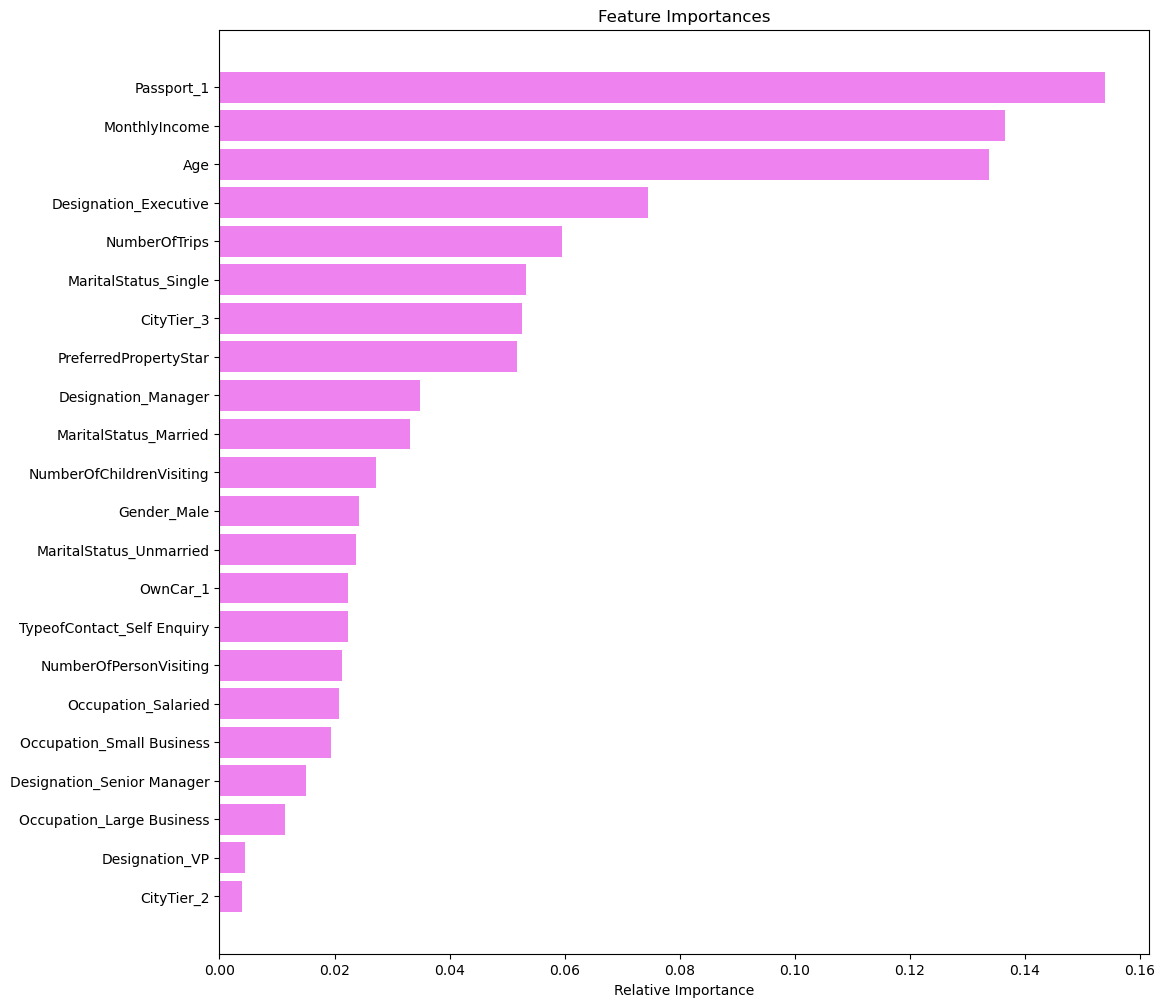

In [130]:
check_feature_importance(rf_estimator_weighted)

Passport_1, MonthlyIncome, Age, Designation_Executive, NumberOfTrips are top 5 important features according to tuned Random Forest Classifier

#### Decision Tree Estimator Tuned

In [131]:
%%time
# Choose the type of classifier.
dtree_estimator_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}],
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_tuned, parameters, scoring=acc_scorer,n_jobs=-1,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator_tuned.fit(X_train, y_train)

CPU times: user 517 ms, sys: 45.2 ms, total: 562 ms
Wall time: 1.22 s


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       max_leaf_nodes=5, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_tuned_score=get_metrics_score(dtree_estimator_tuned)

In [ ]:
make_confusion_matrix(dtree_estimator_tuned, y_test)

In [ ]:
dtree_score=get_metrics_score(dtree_estimator_tuned)

In [ ]:
check_feature_importance(dtree_estimator_tuned)

Passport_1, Designation_Executive, CityTier_3 and MaritasStatus_Single are most important features according to tuned Decision Tree Estimator

### Comparing model performance

In [ ]:
models = []
models = [bagging_estimator_tuned, rf_estimator_weighted, dtree_estimator_tuned]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []

In [ ]:
for model in models:
    metric = get_metrics_score(model,False)
    acc_train.append(np.round(metric[0],2))
    acc_test.append(np.round(metric[1],2))
    recall_train.append(np.round(metric[2],2))
    recall_test.append(np.round(metric[3],2))
    precision_train.append(np.round(metric[4],2))
    precision_test.append(np.round(metric[5],2))
    f1score_train.append(np.round(metric[6],2))
    f1score_test.append(np.round(metric[7],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier tuned', 'Random Forest tuned','Decision Tree tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train_f1score':f1score_train,'Test_f1score':f1score_test}) 
comparison_frame

Observations:

- Comparing Bagging Classifier, Random Forest Classifier and Deicision Tree Classifier which are tuned

    - BaggingClassifier is overfitting on Train data
    
    - RandomForest has 0.70 recall score on Train data and 0.64 recall score on Test data which has significantly increased from Random Forest model build with default parameters. Model is not overfitting here. 
    
    - DecisionTree Classifier has same recall score for both train and test data, overfitting is reduced but there is no improvement in test recall score
    
    - Among these three models, Random Forest tuned Classifier has better performance

### Boosting

#### Ada Boost Classifier

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)


In [ ]:
ab_score=get_metrics_score(ab_classifier)

In [ ]:
make_confusion_matrix(ab_classifier, y_test)

#### Adaboost Classifier Tuned

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,n_jobs=-1,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
ab_score=get_metrics_score(abc_tuned)

In [ ]:
make_confusion_matrix(abc_tuned, y_test)

#### Gradientboost Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)


In [ ]:
gb_score=get_metrics_score(gb_classifier)

In [ ]:
make_confusion_matrix(gb_classifier, y_test)

#### Gradientboost Classifier Tuned

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,n_jobs=-1,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
gb_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
make_confusion_matrix(gbc_tuned, y_test)

#### XGBoost

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

In [ ]:
xgb_score=get_metrics_score(xgb_classifier)

In [ ]:
make_confusion_matrix(xgb_classifier, y_test)

#### Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_estimator_weighted), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree)]

final_estimator = xgb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
stk_score=get_metrics_score(stacking_classifier)

In [ ]:
make_confusion_matrix(stacking_classifier, y_test)

### Comparing model performance

In [ ]:
models = []
models = [ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier, stacking_classifier]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []

In [ ]:
for model in models:
    metric = get_metrics_score(model,False)
    acc_train.append(np.round(metric[0],2))
    acc_test.append(np.round(metric[1],2))
    recall_train.append(np.round(metric[2],2))
    recall_test.append(np.round(metric[3],2))
    precision_train.append(np.round(metric[4],2))
    precision_test.append(np.round(metric[5],2))
    f1score_train.append(np.round(metric[6],2))
    f1score_test.append(np.round(metric[7],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Adaboost Classifier default','Adaboost Classifier tuned','Gradientboost default',
                                         'Gradientboost tuned','XGBoost default','Stacking default'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train_f1score':f1score_train,'Test_f1score':f1score_test}) 
comparison_frame

Observations:

- Comparing Adaboost Classifier default, Adaboost Classifier tuned, Gradientboost default, Gradientboost tuned, XGBoost default and Stacking default models

    - There is no significant improvement in the test recall scores when compared to Bagging models.
    
    
    
- Overall Tuned Random Forest Classifier shows better performance with 0.70 recall score on Train set and 0.64 recall score on test data set

### Business Recommendataions based on EDA

    - Most of the customers pitched Basic package which is less expensive when compared to other packages. Company can review the prices of other packages or if company can offer some deals on other packages, there are high chances for customers to buy other packages too

    - If company can follow-up with the customers for pitching new product, there are more chances for buying it

    - If customer has a passport, there are high chances of buying the new package

    - There are chances for Large Business owners and Freelancers to buy the package if company can contact them and do regular followups

    - If Company can contact customers who have Senior Manager, VP and AVP designations and do followups there are chances for these customers to buy the package